In [1]:
library(tidyverse)
library("caret")
library("lmtest")
library("magrittr")
library("dplyr")
library("tidyr")
library("popbio")
library("e1071")

Warning message:
"package 'tidyverse' was built under R version 4.1.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"package 'tidyr' was built under R version 4.1.2"
Warning message:
"package 'readr' was built under R version 4.1.2"
Warning message:
"package 'forcats' was built under R version 4.1.2"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'caret' was built under R version 4.1.3"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Warning message:
"package 'lmtest' was built under R version 4.

In [2]:
setwd('/Users/georg/Documents/GitHub/Fab-Five-Final-Project')
wine <- read.csv("./Data/WineQT.csv")

In [3]:
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5


## wrangle data

In [4]:
names(wine) <- str_replace_all(names(wine), c(" "="."))

In [5]:
wine = subset(wine, select = -c(Id))
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


### Recoding Wine Quality

In [6]:
wine$qualityR <- NA
wine$qualityR[wine$quality==3] <- 0
wine$qualityR[wine$quality==4] <- 0
wine$qualityR[wine$quality==5] <- 0
wine$qualityR[wine$quality==6] <- 1
wine$qualityR[wine$quality==7] <- 1
wine$qualityR[wine$quality==8] <- 1
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,qualityR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0


## base logistic regression model

In [7]:
mylogit <- glm(qualityR ~ fixed.acidity + volatile.acidity + citric.acid + 
                  residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide+
                  density + pH + sulphates + alcohol, data = wine, family="binomial")

## Predicting Wine Quality

In [8]:
probabilities <- predict(mylogit, type = "response")

In [9]:
avg <- mean(probabilities)
wine$Predicted <- ifelse(probabilities > avg, "good", "poor")
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,qualityR,Predicted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,poor
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0,poor
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0,poor
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1,good
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,poor
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0,poor


## Recoding the Predicted Variable

In [10]:
wine$PredictedR <- NA

In [11]:
wine$PredictedR[wine$Predicted=="good"] <- 1
wine$PredictedR[wine$Predicted=="poor"] <- 0
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,qualityR,Predicted,PredictedR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,poor,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0,poor,0
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0,poor,0
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1,good,1
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,poor,0
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0,poor,0


## Converting Variables to Factors

In [12]:
wine$PredictedR <- as.factor(wine$PredictedR)
wine$qualityR <- as.factor(wine$qualityR)
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,qualityR,Predicted,PredictedR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<chr>,<fct>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,poor,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0,poor,0
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0,poor,0
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1,good,1
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,poor,0
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0,poor,0


## Creating a Confusion Matrix

In [13]:
conf_mat <- caret::confusionMatrix(wine$PredictedR, wine$qualityR)
conf_mat

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 410 166
         1 112 455
                                          
               Accuracy : 0.7568          
                 95% CI : (0.7308, 0.7814)
    No Information Rate : 0.5433          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5139          
                                          
 Mcnemar's Test P-Value : 0.001479        
                                          
            Sensitivity : 0.7854          
            Specificity : 0.7327          
         Pos Pred Value : 0.7118          
         Neg Pred Value : 0.8025          
             Prevalence : 0.4567          
         Detection Rate : 0.3587          
   Detection Prevalence : 0.5039          
      Balanced Accuracy : 0.7591          
                                          
       'Positive' Class : 0               
                              

## Logit Linearity

In [14]:
wine1 <- wine %>% dplyr::select_if(is.numeric)
predictors <- colnames(wine1)
wine1 <- wine1 %>% mutate(logit=log(probabilities/(1-probabilities))) %>%
gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



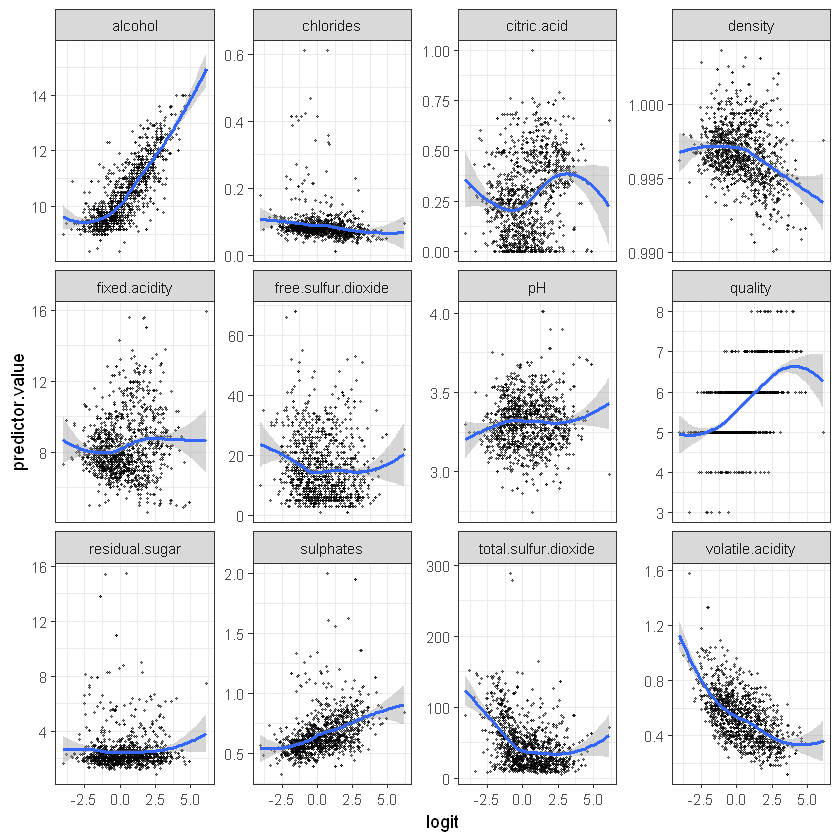

In [15]:
ggplot(wine1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

## Test for independence of errors

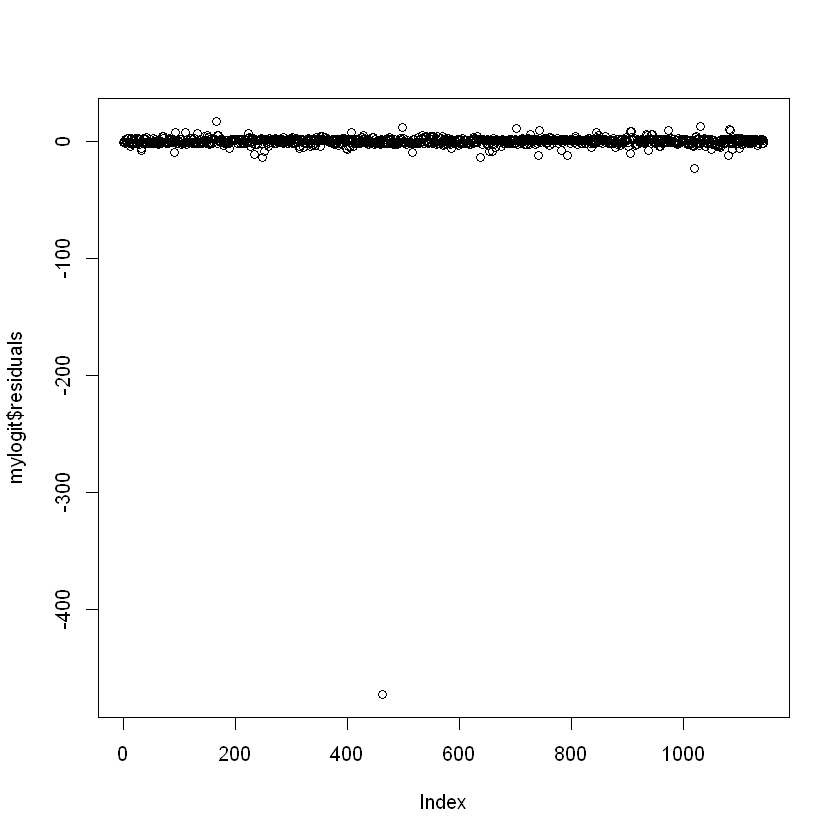

In [16]:
plot(mylogit$residuals)

In [17]:
dwtest(mylogit, alternative="two.sided")


	Durbin-Watson test

data:  mylogit
DW = 1.8156, p-value = 0.001465
alternative hypothesis: true autocorrelation is not 0
